<a href="https://colab.research.google.com/github/erlanig/machine-learning/blob/main/K-Means%20and%20Elbow%20Method_Iris%20Datasset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Melakukan Clustering Menggunakan Sample Dataset

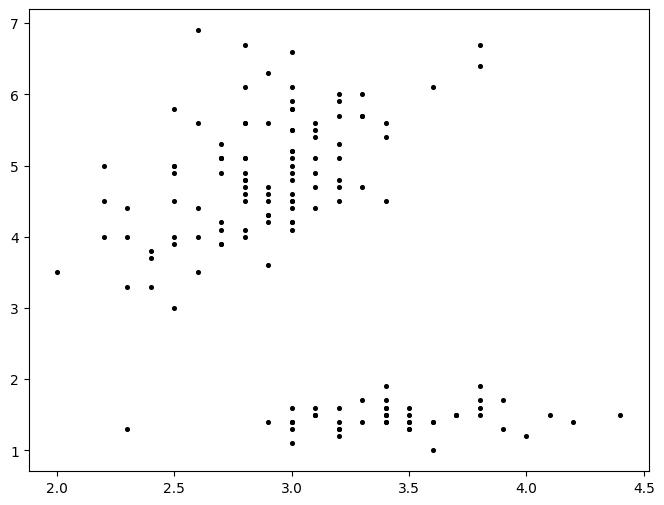

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score

# Load dataset Iris
iris = datasets.load_iris()
X = iris.data[:, [1, 2]]

# Plot dataset dengan ukuran yang lebih kecil
plt.figure(figsize=(8, 6))
f1 = iris.data[:, 1]
f2 = iris.data[:, 2]
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

plt.show()

In [ ]:
#menentukan dimensi dari dataset
print(X.shape)

(150, 2)


In [ ]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Inisialisasi dan fitting model KMeans
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(X)
# Mencetak nilai centroid
C = kmeans.cluster_centers_
print(C)


[[3.40980392 1.49215686]
 [2.87575758 4.92525253]]


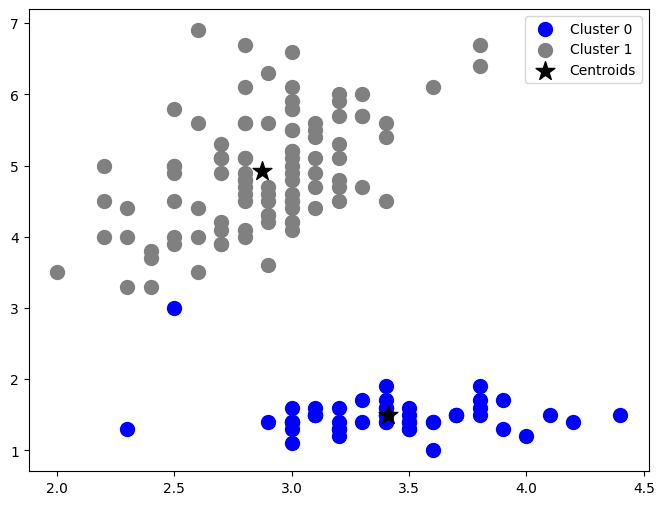

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='blue', label='Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='grey', label='Cluster 1')

# Plotting centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='*', c='black', label='Centroids')
plt.legend()
plt.show()


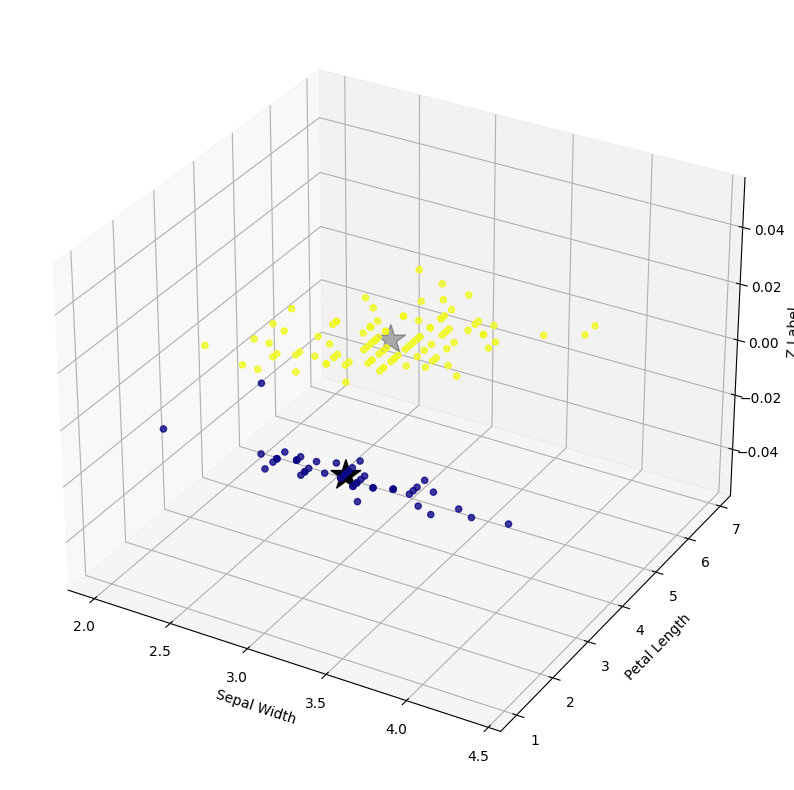

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (10, 10)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='plasma', alpha=0.80)
ax.scatter(C[:, 0], C[:, 1], marker='*', color='black', s=500)
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Z Label')
plt.show()


In [ ]:
import warnings
warnings.filterwarnings('ignore')

for k in range (1, 10):
  # Menentukan jumlah cluster
  kmeans = KMeans(n_clusters=k, random_state=1)
  # Fitting input data
  kmeans = kmeans.fit(X)
  # Mendapatkan cluster labels
  labels = kmeans.predict(X)
  # Menghitung jumlahan jarak antara setiap sampel dengan cluster centroid-nya (SSE)
  interia = kmeans.inertia_
  print("k:",k, " cost:", interia)
print("")

from sklearn.metrics.cluster import silhouette_score
# Evaluasi menggunakan silhouette coefficient
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Coefficient: {silhouette_avg}")

k: 1  cost: 492.63233333333346
k: 2  cost: 86.31064765300059
k: 3  cost: 40.737074092207266
k: 4  cost: 27.48469523809524
k: 5  cost: 23.340085051338022
k: 6  cost: 19.280335839599
k: 7  cost: 15.863247083410169
k: 8  cost: 14.026659632553908
k: 9  cost: 12.550543128348735

Silhouette Coefficient: 0.7392862954615389


# Elbow Method

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

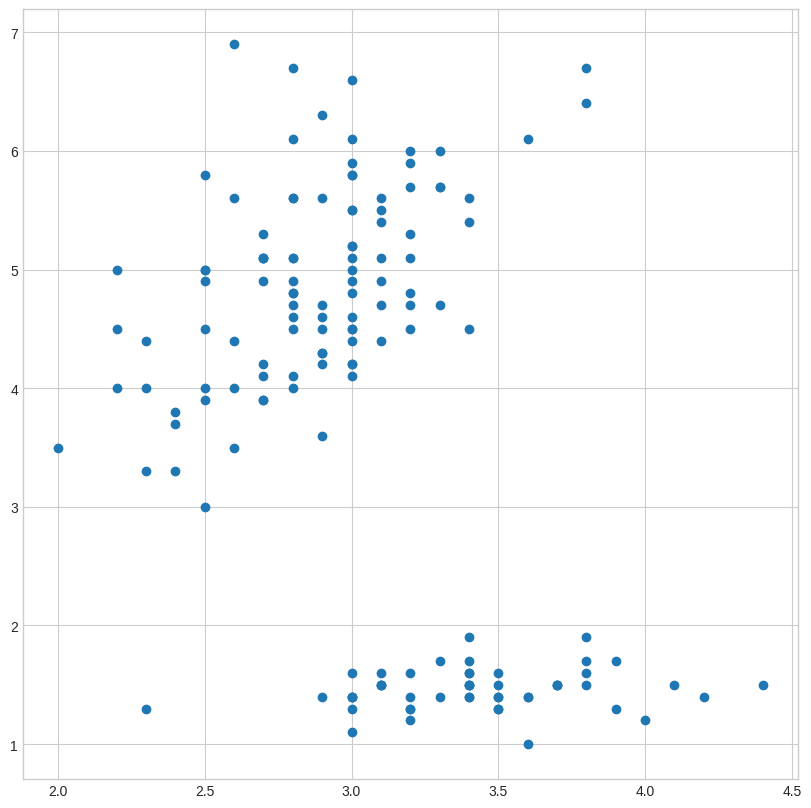

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

# mengambil data dari fitur data iris
plt.plot()
plt.scatter(features[1],features[2])
plt.show()

In [ ]:
X = np.array(list(zip(features[1], features[2]))).reshape(len(features[1]), 2)
SSE = []
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k).fit(X)
  kmeanModel.fit(X)
  SSE.append(kmeanModel.inertia_)

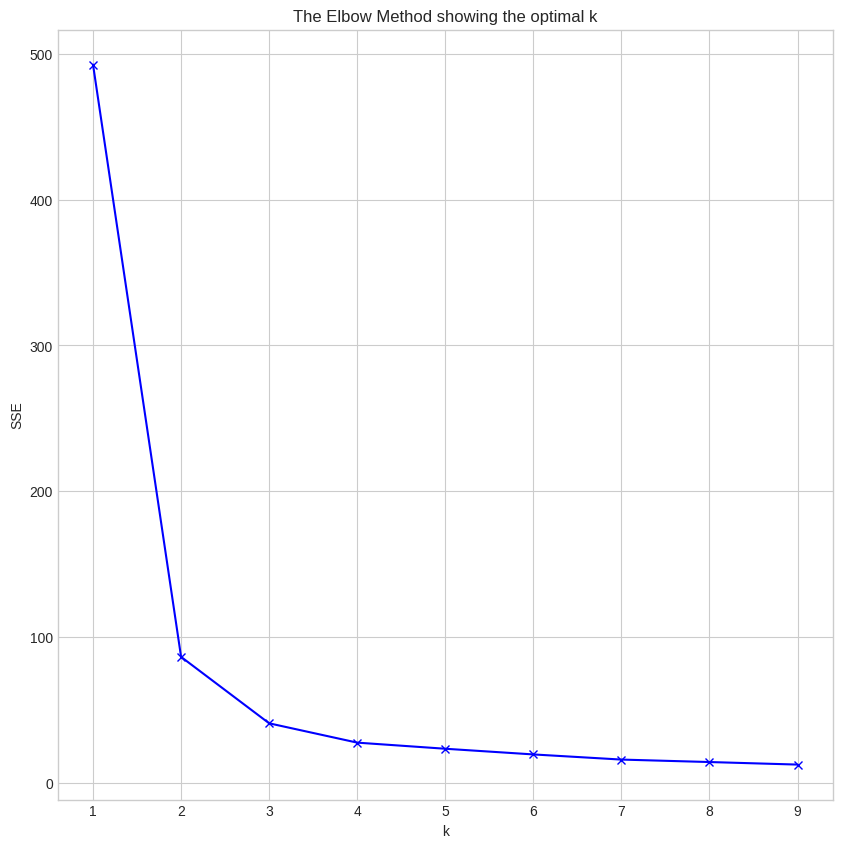

In [ ]:
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

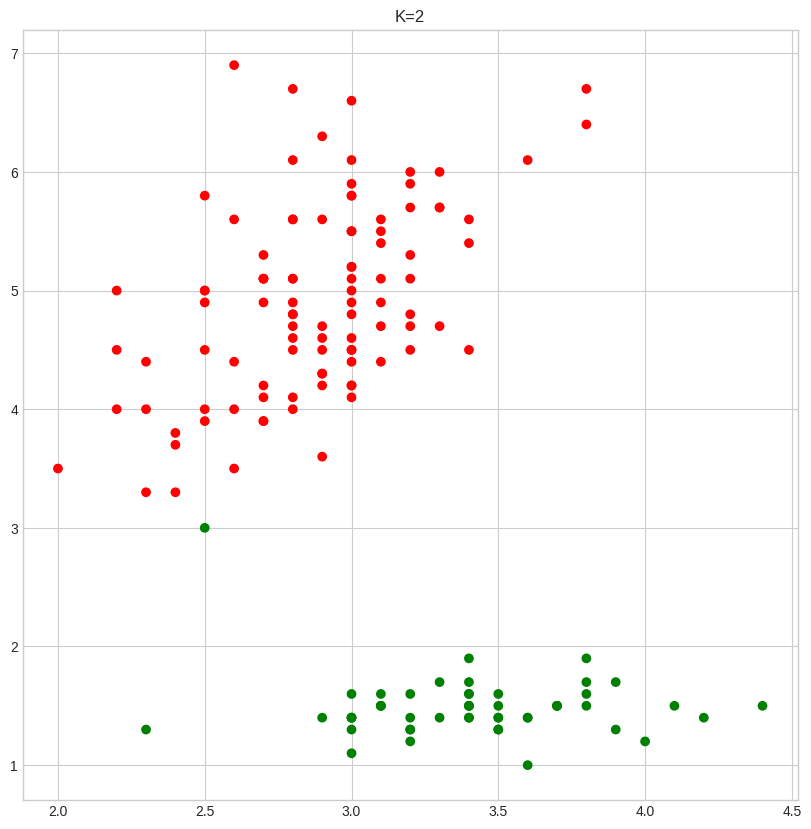

In [ ]:
y_pred = KMeans(n_clusters=2).fit_predict(X)
plt.plot()
LABEL_COLOR_MAP = {0 : 'r',
                  1 : 'g',
                  }
label_color = [LABEL_COLOR_MAP[l] for l in y_pred]
plt.scatter(features[1], features[2], c=label_color)
plt.title("K=2")
plt.show()

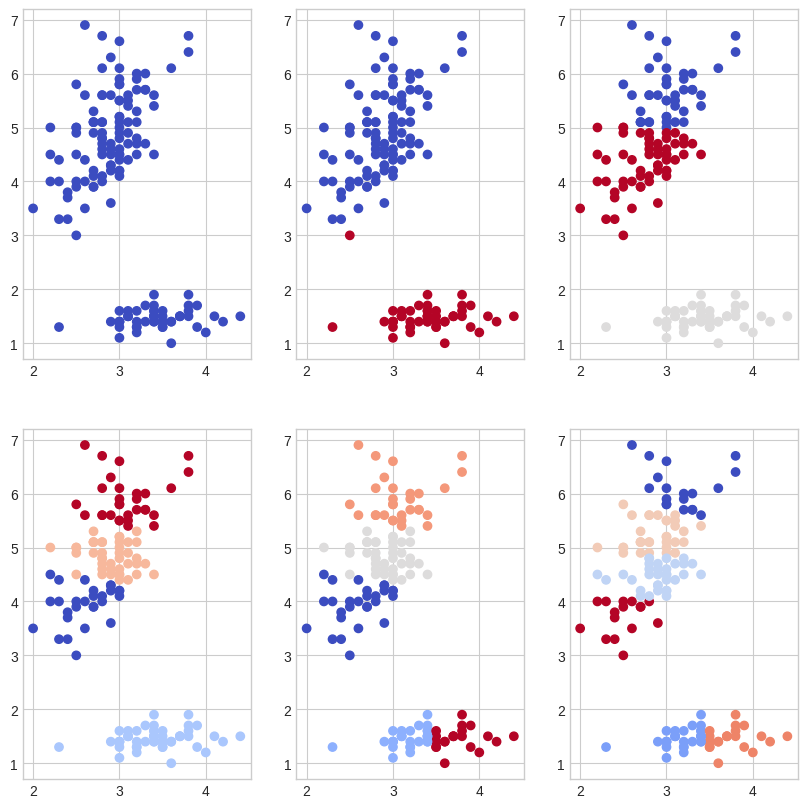

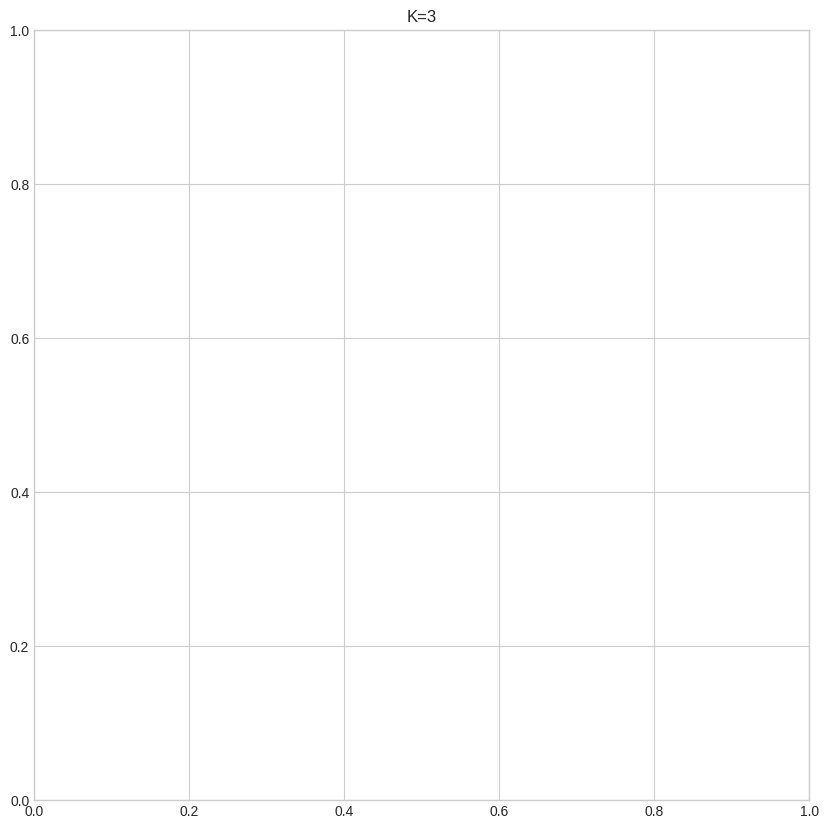

In [ ]:
figure,ax=plt.subplots(2,3)
K=range(1,7)
for k in K:
  if(k<4):
    row=0
    column=k-1
  else:
    row=1
    column=k-4
  kmeanModel = KMeans(n_clusters=k).fit(X)
  y_pred = kmeanModel.fit_predict(X)
  ax[row][column].scatter(features[1],features[2], c=y_pred, cmap='coolwarm')

plt.show()
plt.title("K=3")
plt.show()

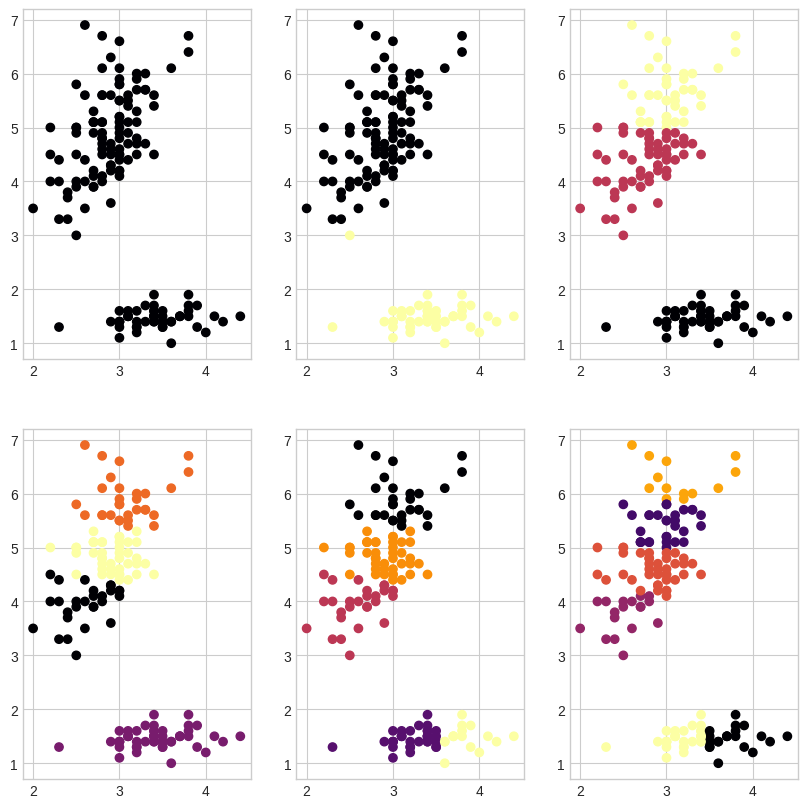

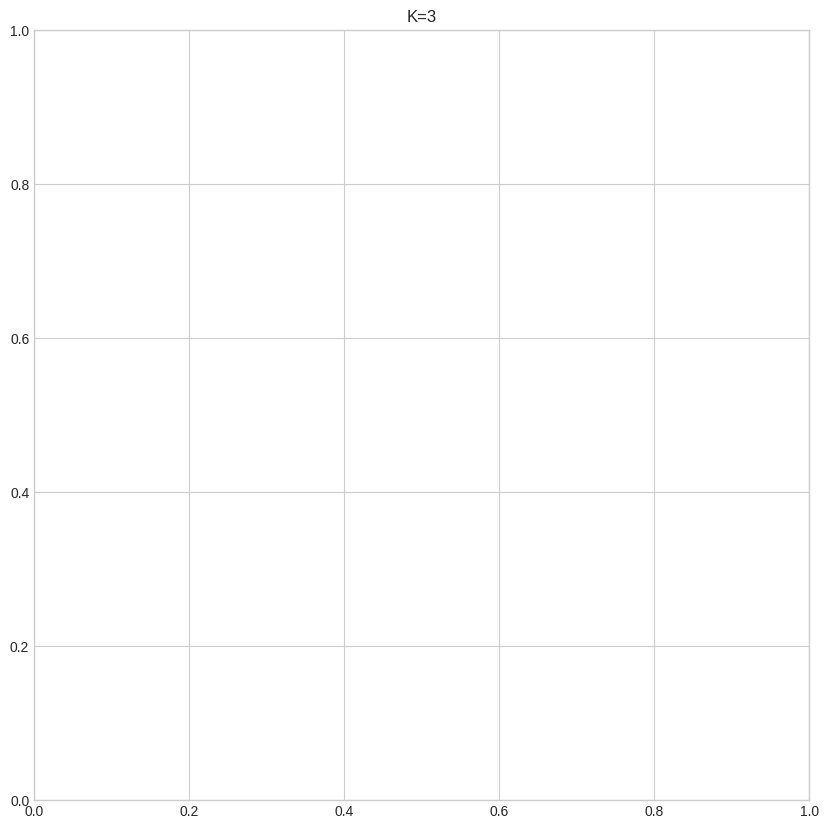

In [ ]:
figure,ax=plt.subplots(2,3)
K=range(1,7)
for k in K:
  if(k<4):
    row=0
    column=k-1
  else:
    row=1
    column=k-4
  kmeanModel = KMeans(n_clusters=k).fit(X)
  y_pred = kmeanModel.fit_predict(X)
  ax[row][column].scatter(features[1],features[2], c=y_pred, cmap='inferno')

plt.show()
plt.title("K=2")
plt.show()